In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [19]:
path = 'Dataset.csv'
df = pd.read_csv(path)
df.head()

,id,comment,label
0,1,Hello mr namal ponnaya 🖕 ponnaya 🖕,YES
1,2,Keri ponnaya🍌🖕,YES
2,3,ane palayan huththo yannaAmmo huththo ukbe art...,YES
3,4,dan balan idapn ranil rata hadawi danatama uge...,YES
4,5,Mr namal ponnaya 😡🤬,YES


In [20]:
##removing unwanted column
df = df.drop(['id'], axis=1)
df.head()

,comment,label
0,Hello mr namal ponnaya 🖕 ponnaya 🖕,YES
1,Keri ponnaya🍌🖕,YES
2,ane palayan huththo yannaAmmo huththo ukbe art...,YES
3,dan balan idapn ranil rata hadawi danatama uge...,YES
4,Mr namal ponnaya 😡🤬,YES


In [21]:
## Exploratory Data Analysis¶

In [22]:
print('found %s datas'% len(df))

found 9610 datas


In [23]:
df['label'].value_counts()

YES    5061
NO     4549
Name: label, dtype: int64

In [24]:
##renaming the columns
df = df.rename(columns={'comment': 'text'})

In [25]:
df.head()

,text,label
0,Hello mr namal ponnaya 🖕 ponnaya 🖕,YES
1,Keri ponnaya🍌🖕,YES
2,ane palayan huththo yannaAmmo huththo ukbe art...,YES
3,dan balan idapn ranil rata hadawi danatama uge...,YES
4,Mr namal ponnaya 😡🤬,YES


In [26]:
##renaming the column values
df['label'] = df['label'].map({'YES': 'Hate Speech', 'NO': 'Non-Hate Speech'})

In [27]:
df.head()

,text,label
0,Hello mr namal ponnaya 🖕 ponnaya 🖕,Hate Speech
1,Keri ponnaya🍌🖕,Hate Speech
2,ane palayan huththo yannaAmmo huththo ukbe art...,Hate Speech
3,dan balan idapn ranil rata hadawi danatama uge...,Hate Speech
4,Mr namal ponnaya 😡🤬,Hate Speech


In [28]:
# Preprocessing

In [29]:
df = df.groupby('label').head(4549)

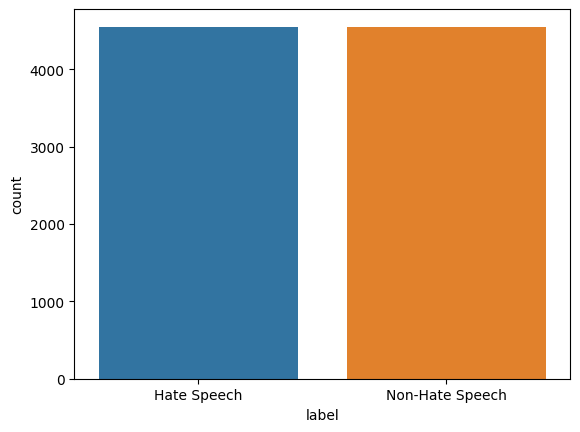

In [30]:
df_label = sns.countplot(x='label', data=df)
df_label.set_xticklabels(df['label'].unique())
plt.show()

In [31]:
df['label'].value_counts()

Hate Speech        4549
Non-Hate Speech    4549
Name: label, dtype: int64

In [32]:
#Feature Extraction using TF-IDF

In [33]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['label']

In [34]:
#train test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#Build Model
#Naive Bayes

In [37]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [38]:
pred_nb = clf_nb.predict(X_test)

In [39]:
import pickle
with open('my_model.pkl', 'wb') as f:
     pickle.dump(clf_nb, f)

In [40]:
f = open('my_model.pkl', 'rb')  # 'r' for reading; can be omitted
mod = pickle.load(f)

In [41]:
#Evaluation

In [42]:
#Printing of Naive Bayes Report 

In [43]:
print(classification_report(y_test,pred_nb))

                 precision    recall  f1-score   support

    Hate Speech       0.64      0.78      0.70       922
Non-Hate Speech       0.71      0.54      0.61       898

       accuracy                           0.66      1820
      macro avg       0.67      0.66      0.66      1820
   weighted avg       0.67      0.66      0.66      1820



In [44]:
text = ['පලයං හුත්තෝ']
text_features = tfidf.transform (text)
predictions = mod.predict (text_features)
predictions

array(['Hate Speech'], dtype='<U15')